<a href="https://colab.research.google.com/github/crinex/Study-with-Diabetes-ML-/blob/main/MultiLayer_Perceptron(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다중 레이어 퍼셉트론(MLP)


### 당뇨병을 예측해보자
- 당뇨병은 제1형 당뇨와 2형 당뇨로 나뉜다.
- 제1형 : 체내에서 인슐린을 충분히 생산하지 못해 발생, 제2형에 비해 희귀하고 정확한 원인이 밝혀지지 않았다.
- 제2형 : 점진적인 인슐린 저항으로 발생, 전 세계적으로 가장 흔한 당뇨 유형이며 과체중, 운동 부족, 잘못된 식습관 등이 주요 원인 2형 당뇨의 경우엔 조기 진단으로 예방하고 치료가 가능하다.
- 당뇨 초기에는 별다른 증상이 나타나지 않아 조기 진단이 어렵다. 
- 이러한 문제를 머신 러닝으로 해결하고자 한다. 환자의 상태를 측정한 의료 데이터와 측정 후 몇 년 내 당뇨가 발병했는지 여부를 기록한 데이터가 있다면 이 데이터로 분류 모델을 훈련시키고 새로운 환자의 발병 여부를 예측할 수 있다.

### EDA
- 피마 인디언 당뇨 데이터셋을 분석한다.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 이 데이터셋에는 9개의 칼럼이 있다.
- Pregnancies : 과거 임신 횟수
- Glucose : 혈장(plasma)혈당
- BloodPressure : 이완기(diastolic)혈압
- SkinThickness : 삼두근에서 측정한 피부두겹두께(skin fold thickness)
- Insulin : 혈청(blood serum)인슐린 농도
- BMI : 체질량지수
- DiabetesPedigreeFunction : 환자가 당뇨에 얼마나 취약한지 요약한 점수, 환자의 당뇨 가족력을 바탕으로 추정한 점수
- Age : 햇수로 계산한 나이
- Outcome : 예측 목표 변수, 최초 측정 이후 5년 내 당뇨가 발생하면 1, 미발병시 0

### Data Visualization

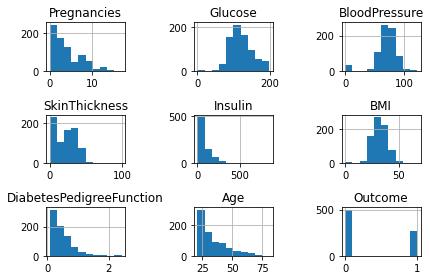

In [8]:
df.hist()
plt.tight_layout()
plt.show()

- Age 차트를 보면 대부분 젊은환자가 대부분이다.
- Glucose, BloodPressure, BMI는 정규분포 모양을 한다.
- BloodPressure, BMI, Glusose는 0값을 가질수 없으므로 결측값이 존재한다고 볼 수 있다.
- Pregnancies값에도 이상치는 보인다. 이상치는 예측 결과를 왜곡할 수 있으므로 주의한다.
- 변수들이 각각 다른 범위를 가지므로 표준화가 필요하다

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

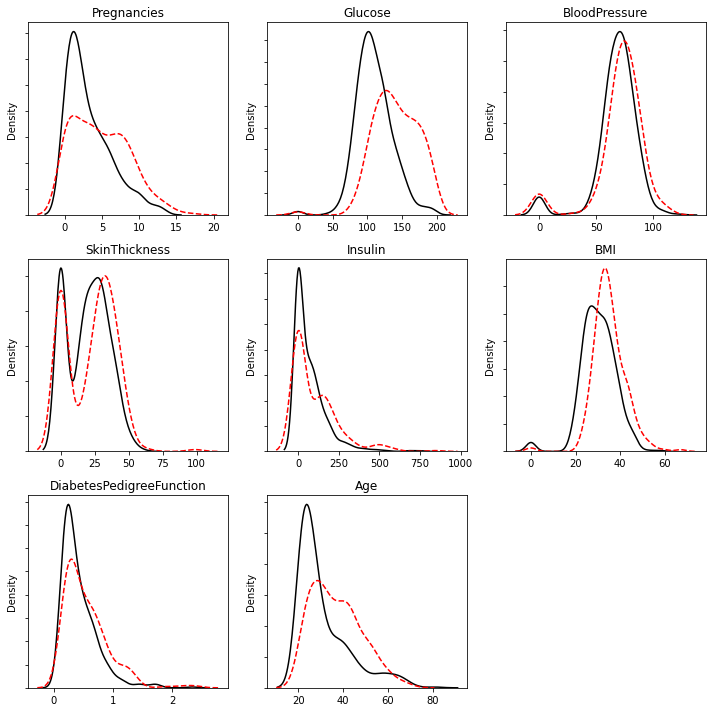

In [14]:
# 3x3 크기의 서브차트 만든다
plt.subplots(3,3,figsize=(10,10))

# 각 특징 변수의 밀도 차트 그린다.
for idx, col in enumerate(df.columns[:-1]):
  ax = plt.subplot(3,3, idx+1)
  ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
  sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'red', 'label':"Diabetes"})
  ax.set_title(col)

# 차트가 8개 뿐이므로 9번째 서브차트는 숨긴다.
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

- 미발병자 : 실선, 발병자 : 점선
- Glucose 그래프를 보면 미발병자의 Glucose는 100을 중심으로 정규분포를 보인다. 즉, 건강한 사람의 혈당은 100정도다. 발병자의 경우엔 퍼진 종 모양을 하고 있고 150주변에 위치한다.
- BMI 그래프를 보면 발병자가 훨씬 많다.
- SkinThickness와 BloodPressure는 발병자와 미발병자간의 차이가 없으므로 예측하는데에 도움이 안될것이다.


### EDA


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- isnull() : 결측값있는지 확인
- sum() : 총합을 반환
- df.isnull().sum() : df 데이터에 결측값이 있는지 확인하고 총합을 반환한다.
- 모두 0으로 반환한것을 보아 결측값이 없는것처럼 보일 수 있으나 수치가 0으로 적혀있으면 NaN가 아니므로 결측값이 아니라고 판단한다. 따라서 통계요약수치로 0이 있으면 안되는 컬럼에 0이 들어있는지 확인할 필요가 있다.

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- describe() : 데이터셋의 통계 요약
- 혈당, 혈압, 피부두께 등 최솟값이 0일 수 없는 데이터에 0이 있는걸로 보아 결측값이 존재한다고 생각할 수 있다

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 이 데이터셋은 총 768개의 행과 9개의 열로 이루어져 있다.
- 각 칼럼에 0이 몇 개 있는지 확인해보자

In [19]:
print("Number of rows with 0 Values for each Variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col+":"+str(missing_rows))

Number of rows with 0 Values for each Variable
Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


- 각 칼럼이 가진 0의 개수를 알 수 있다.
- 결측값을 처리하는 방법으로는
- 결측값이 존재하는 모든 행을 삭제하거나 대체값으로 채우는것이다.
- 이번에는 평균을 대체값으로 사용해본다.
- 먼저 0값을 NaN으로 바꿔 결측값으로 인식하게 만들어준다.

In [22]:
df.Glucose = df.Glucose.replace(0, np.nan)
df.BloodPressure = df.BloodPressure.replace(0, np.nan)
df.SkinThickness = df.SkinThickness.replace(0, np.nan)
df.Insulin = df.Insulin.replace(0, np.nan)
df.BMI = df.BMI.replace(0, np.nan)

In [23]:
print("Number of rows with 0 Values for each Variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col+":"+str(missing_rows))

Number of rows with 0 Values for each Variable
Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


- Pregnancies, Outcome은 0값이 정상이므로 바꾸지 않고 나머지 0값이 모두 대체된것을 확인할 수 있다.

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
df.Glucose = df.Glucose.fillna(df.Glucose.mean())
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())

## Data Standardization
- 데이터 표준화는 데이터셋이 평균이 0 분산이 1이 되도록 변환하는 전처리 과정이다. 

In [27]:
df_scaled = preprocessing.scale(df)

In [28]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [29]:
df_scaled.Outcome = df.Outcome
df = df_scaled

### 데이터 분할

In [31]:
x = df.loc[:, df.columns != 'Outcome']
y = df.Outcome

- 훈련 데이터 80%
- 테스트 데이터 20%

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

- 마지막으로 검증 데이터셋을 만든다.

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

### 다중 레이어 퍼셉트론
- MLP는 전방향 신경망이지만 은닉 레이어를 최소 한 개 이상 가지며 각 레이어에 비선형 활성화 함수가 존재한다. 
- 이 구조는 결정 경계를 비선형으로 만들 수 있어 다차원 데이터에 적합하다.
- 이번에는 2개의 은닉 레이어를 사용한다.

### 정리
- 입력 레이어 : 각 노드는 데이터셋의 각 특징 변수와 같다. 즉, 입력 레이어의 노드가 8개다.
- 은닉 레이어 : 입력 레이어의 출력을 입력받아 비선형 활성화 함수를 계산한다.
- 활성화 함수 : ReLU, Sigmoid함수를 사용한다.
- ReLU : 신경망 중간에 위치한 은닉 레이어에 주로 사용되는 활성화 함수다. 단순히 입력값이 양수일때만 값을 그대로 반환해주고 음수면 0으로 만든다.
- Sigmoid : 마지막 출력 레이어는 클래스 레이블을 예측할 수 있는 함수가 필요하다. 단순히 이진분류 문제라면 0과 1을 출력하면 되므로 시그모이드를 사용한다. 시그모이드는 입력값을 0과 1사이의 값으로 압축시켜준다. 0.5보다 크면 예측결과를 1로 반환하고 0.5보다 작으면 0으로 반환해준다.

## Keras 모델 만들기


In [35]:
model = Sequential()

- 첫 번째 은닉 레이어를 생성한다. 
- 은닉 레이어의 노드를 32개로 설정하고(임의로 설정) 입력 차원은 8개다(칼럼수).
- 첫 번째 레이어에는 입력 차원을 꼭 설정해줘야 한다.

In [36]:
# 첫 번째 레이어
model.add(Dense(32, input_dim=8, activation='relu'))

- 은닉 레이어를 더 추가하면 모델 복잡도를 올릴 수 있지만 과적합이 발생할 수 있다.

In [37]:
# 두 번째 레이어
model.add(Dense(16, activation='relu'))

In [38]:
# 출력 레이어
model.add(Dense(1, activation='sigmoid'))

- 모델 컴파일 : 모델을 훈련시키기 전 훈련 과정에 필요한 매개변수를 정의해준다.
- optimizer : adam을 사용한다.
- loss : 이진 분류 문제이므로 binary_crossentropy를 사용한다,.
- metrics(평가지표) : accuracy(정확도)를 모델의 평가지표로 사용한다.

In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5905
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6507
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6374
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.6643
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.7347
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7382
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7472
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7555
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7447
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7317
Epoch 11/

- 이제 테스트 데이터셋과 추가 평가 지표를 활용해 모델 성능을 최종 평가한다.


## 결과 분석
- 테스트 정확도, 혼동행렬(confuse matrix), ROC 곡선을 이용해 모델을 최종 평가한다.
- 모델 성능은 evaluate()함수를 사용한다.

In [41]:
scores = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9145
Training Accuracy: 91.45%

5/5 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7338
Testing Accuracy: 73.38%



- 훈련 데이터셋의 정확도는 91.45%
- 테스트 데이터셋의 정확도는 73.38%
- 새로운 환자의 8가지 측정 항목만 있으면 그 환자의 향후 5년 내에 당뇨가 발병할지 여부를 최대 73% 정확도로 예측할 수 있다.

### 혼동 행렬(confuse matrix)
- 혼동 행렬은 모델이 예측한 결과의 진음성, 위양성, 위음성, 진양성 지표를 분석할 수 있는 시각화 방식이다.
- 진음성 : 실제 클래스가 음성(당뇨 미발병)이고 모델도 음성(미발병)으로 예측한 경우
- 위양성 : 실제 클래스는 음성(미발병)인데 모델은 양성(발병)으로 예측한 경우
- 위음성 : 실제 클래스는 양성(발병)인데 모델은 음성(미발병)으로 예측한 경우
- 진양성 : 실제 클래스가 양성(발병)인데 모델도 양성(발병)으로 예측한 경우
- 즉, 좋은 모델은 진음성과 진양성을 최대로하고 위음성과 위양성을 최소로 줄이는 모델이다.

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


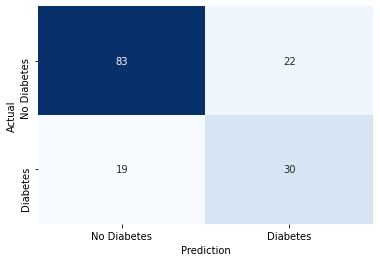

<Figure size 432x288 with 0 Axes>

In [43]:
y_test_pred = model.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

plt.show()
plt.clf()

### ROC Curve
- ROC 곡선은 위양성률을 x축에 놓고 진양성률을 y축에 그린 차트다
- ROC 곡선으로 모델 성능을 평가하는 척도는 AUC(Area Under the Curve)다.
- AUC가 크다면 클래스 분류 정확도가 높다는 뜻이고 AUC가 낮다면 모델의 정확도가 나쁘고 예측이 자주 빗나간다는 의미다.

In [44]:
from sklearn.metrics import roc_curve

y_test_pred_probs = model.predict(x_test)

In [45]:
# FPR = 위양성률
# TPR = 진양성률
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

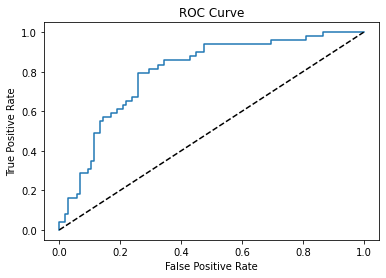

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--',color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

### 모델 개선
- 어떻게 위음성, 위양성을 낮추고 모델의 정확도를 올릴수 있을까?
- 모델 성능이 잘 나오지 않는 이유는 여러가지가 있지만 신경망의 복잡도 보단 예측 성능을 좌우하는 강력한 특징변수가 부족한 경우에 주로 발생한다.
- 이번 데이터의 특징 변수의 양이 8개로 부족한 것도 있고 전체 데이터양이 부족한 것도 이유일 수 있다.
- 모델에 사용할 특징 변수를 늘리는 방법중 하나로는 특징 공학(Feature Engineering)기법을 사용할 수 있다.
- 특징 공학은 도메인 지식을 활용해 머신 러닝에 사용할 새로운 특징 변수를 생성하는 과정이다.
- 이 밖에도 특징 선택 방식도 있다. 특징 선택은 데이터셋에 잡음이 너무 많아 이를 제거해 성능을 개선할 수 있을 때 유용하다.
- 변수를 선택할 때는 의사결정트리를 사용한다. 의사결정트리는 변수 값의 통계를 바탕으로 특징 변수의 중요도를 나열할 수 있는데 이 기능을 특징 변수선택에도 유용하게 활용할 수 있다.
- 먼저 의사결정트리로 학습시키고 트리가 출력한 결과를 바탕으로 중요하지 않은 변수를 제거한 후 신경망에 사용한다.